# Transformări Matriciale, Produs Scalar și Valori Proprii

Până acum am lucrat cu numere, texte și structuri de date simple. Acum, vom face un pas înainte și vom explora câteva concepte fundamentale din **Algebra Liniară**, o ramură a matematicii esențială pentru domenii precum **Inteligența Artificială**, **Machine Learning** și **Computer Graphics**.

Poate suna intimidant, dar vom aborda totul pas cu pas, cu exemple vizuale și simple. Vom învăța cum putem folosi matricile pentru a **transforma** obiecte (a le roti, a le mări sau a le muta), cum să calculăm **produsul scalar** între doi vectori pentru a înțelege relația dintre ei și, în final, vom descoperi conceptele de **valori proprii** și **vectori proprii**, care ne arată direcțiile "speciale" pe care o transformare le păstrează neschimbate.

Pentru acest capitol, vom folosi două biblioteci foarte puternice: **NumPy** pentru calcule numerice și **Matplotlib** pentru a vizualiza rezultatele. Să începem!

In [1]:
# Să importăm bibliotecile necesare pentru acest capitol
import numpy as np
import matplotlib.pyplot as plt

# OBS.: Folosim `as np` și `as plt` pentru a crea un "alias" (o prescurtare)
# pentru numele bibliotecilor. Astfel, în loc să scriem `numpy.array()`, vom
# scrie `np.array()`, ceea ce face codul mai scurt și mai ușor de citit.

## Transformări Matriciale

O **transformare matricială** este, în esență, o funcție care ia un set de puncte (reprezentate ca vectori într-o matrice) și le mută în altă parte. Putem privi o matrice ca pe o colecție ordonată de puncte (sau "vârfuri"). Dacă unim aceste puncte, obținem o formă geometrică, un poligon.

Prin aplicarea unor operații matematice asupra acestei matrici, putem **muta (translata)**, **redimensiona (scala)** sau **roti** forma respectivă în spațiul 2D.

### Reprezentarea Geometrică a unei Matrici

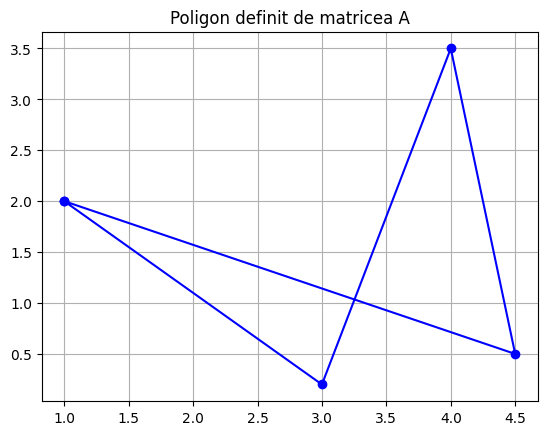

In [2]:
# Exemplu 1: Reprezentarea unui poligon folosind o matrice NumPy

# Definim o matrice unde fiecare coloană este un punct (x, y)
# Punctele sunt: (1, 2), (3, 0.2), (4, 3.5), (4.5, 0.5)
A = np.array([
    [1, 3, 4, 4.5, 1],  # Coordonatele X (am adăugat primul punct la final pentru a închide poligonul)
    [2, 0.2, 3.5, 0.5, 2]   # Coordonatele Y
])

# Extragem coordonatele x și y
x_coords = A[0, :]
y_coords = A[1, :]

# Folosim Matplotlib pentru a desena punctele și liniile
plt.plot(x_coords, y_coords, 'bo-') # 'b' = blue, 'o' = puncte, '-' = linii
plt.grid(True) # Adăugăm un grid pentru a vizualiza mai bine
plt.title("Poligon definit de matricea A")
plt.show()

# OBS.: O matrice de dimensiune 2xN poate reprezenta N puncte într-un plan 2D.
# Prima linie conține coordonatele X, iar a doua linie conține coordonatele Y.
# Funcția `plt.plot()` desenează graficul, iar `plt.show()` îl afișează.

In [ ]:
# __EXERCIȚIU__
# Definiți o matrice NumPy numită `patrat` care să reprezinte un pătrat cu
# colțurile în punctele (0,0), (2,0), (2,2) și (0,2).
# Apoi, folosiți Matplotlib pentru a desena acest pătrat.






# HINT: Matricea voastră ar trebui să aibă 2 linii și 5 coloane.
# Nu uitați să adăugați primul punct la final pentru a închide forma!

### Translația (Mutarea)
Translația este cea mai simplă transformare. Ea presupune **mutarea** sau **deplasarea** fiecărui punct al formei noastre cu o anumită distanță pe axele X și Y, fără a-i schimba forma, mărimea sau orientarea. Acest lucru se realizează prin adunarea unei matrici de translație.

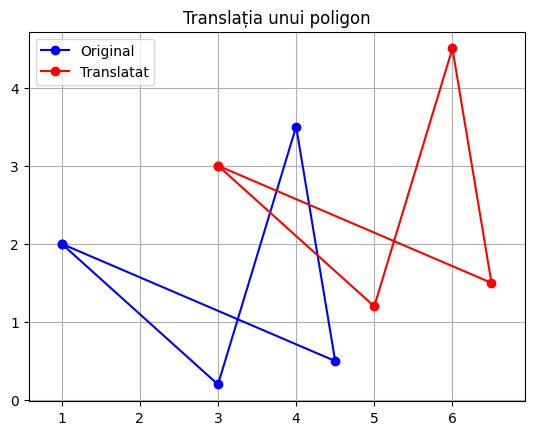

In [3]:
# Exemplu 2: Translatarea poligonului

# Folosim aceeași matrice A de mai devreme
A = np.array([
    [1, 3, 4, 4.5, 1],
    [2, 0.2, 3.5, 0.5, 2]
])

# Definim o matrice de translație. Vom muta fiecare punct cu +2 pe X și +1 pe Y
T = np.array([
    [2, 2, 2, 2, 2],
    [1, 1, 1, 1, 1]
])

# Aplicăm translația prin adunarea matricilor
A_translatat = A + T

# Desenăm ambele poligoane pentru a vedea diferența
plt.plot(A[0, :], A[1, :], 'bo-', label='Original')
plt.plot(A_translatat[0, :], A_translatat[1, :], 'ro-', label='Translatat')
plt.grid(True)
plt.legend() # Afișează legenda (label-urile definite în plot)
plt.title("Translația unui poligon")
plt.axis('equal')
plt.show()

# OBS.: Adunarea matricială se face element cu element. Fiecare coordonată X
# din A a fost adunată cu 2, iar fiecare coordonată Y a fost adunată cu 1.

In [ ]:
# __EXERCIȚIU__
# Definiți o matrice pentru un triunghi cu colțurile (1,1), (3,1), (2,3).
# Creați o matrice de translație pentru a muta triunghiul cu -3 pe axa X.
# Afișați grafic atât triunghiul original, cât și pe cel translatat.


# HINT: Puteți copia vizualizarea matricei de la exemplul anterior.

### Scalarea (Redimensionarea)
Scalarea ne permite să **mărim** sau să **micșorăm** o formă. Această operație se realizează prin înmulțirea matricii cu un număr scalar. Toate punctele sunt "împinse" mai departe de origine (dacă scalarul > 1) sau "trase" mai aproape de origine (dacă 0 < scalar < 1).

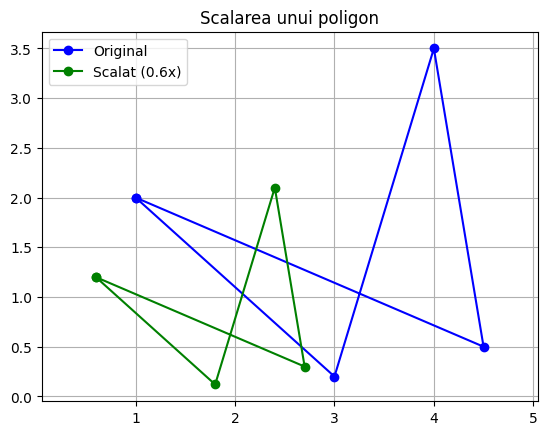

In [4]:
# Exemplu 3: Scalarea poligonului

# Folosim din nou matricea originală A
A = np.array([
    [1, 3, 4, 4.5, 1],
    [2, 0.2, 3.5, 0.5, 2]
])

# Definim un scalar pentru a micșora forma la 60% din mărimea originală
scalar = 0.6

# Aplicăm scalarea prin înmulțire
A_scalat = A * scalar

# Desenăm ambele poligoane
plt.plot(A[0, :], A[1, :], 'bo-', label='Original')
plt.plot(A_scalat[0, :], A_scalat[1, :], 'go-', label='Scalat (0.6x)')
plt.grid(True)
plt.legend()
plt.title("Scalarea unui poligon")
plt.axis('equal') # Asigură că axele au aceeași scară
plt.show()

# OBS.: Înmulțirea cu un scalar înmulțește fiecare element din matrice cu
# acel scalar. Observați cum forma s-a micșorat și s-a apropiat de origine (0,0).

In [ ]:
# __EXERCIȚIU__
# Reluați pătratul de la primul exercițiu (colțuri la (0,0), (2,0), (2,2), (0,2)).
# Aplicați o scalare pentru a-l face de 1.5 ori mai mare.
# Afișați grafic pătratul original și cel scalat.

### Rotația
Rotația ne permite să **rotim** o formă în jurul originii (0,0) cu un anumit unghi. Acest lucru se realizează printr-o operație mai complexă: **înmulțirea matricială** cu o matrice specială, numită **matrice de rotație**.

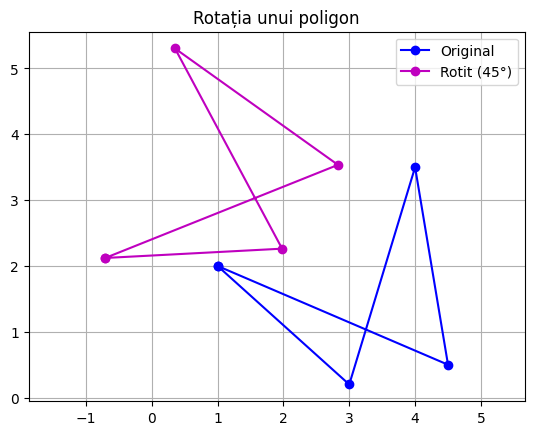

In [5]:
# Exemplu 4: Rotirea poligonului

# Matricea originală A
A = np.array([
    [1, 3, 4, 4.5, 1],
    [2, 0.2, 3.5, 0.5, 2]
])

# Definim unghiul de rotație în grade
unghi_grade = 45
# Convertim unghiul în radiani, deoarece funcțiile NumPy lucrează cu radiani
unghi_radiani = np.deg2rad(unghi_grade)

# Creăm matricea de rotație 2x2
R = np.array([
    [np.cos(unghi_radiani), -np.sin(unghi_radiani)],
    [np.sin(unghi_radiani), np.cos(unghi_radiani)]
])

# Aplicăm rotația prin înmulțire matricială
# Operatorul `@` înseamnă înmulțire matricială în NumPy
A_rotit = R @ A

# Desenăm ambele forme
plt.plot(A[0, :], A[1, :], 'bo-', label='Original')
plt.plot(A_rotit[0, :], A_rotit[1, :], 'mo-', label=f'Rotit ({unghi_grade}°)')
plt.grid(True)
plt.legend()
plt.title("Rotația unui poligon")
plt.axis('equal')
plt.show()

# OBS.: Înmulțirea matricială (cu `@` sau `np.dot()`) nu este același lucru
# cu înmulțirea element cu element (cu `*`). Aceasta combină liniile primei
# matrici cu coloanele celei de-a doua într-un mod specific, rezultând rotația.

In [ ]:
# __EXERCIȚIU__
# Definiți o matrice pentru un dreptunghi cu colțurile la (0,0), (4,0), (4,2), (0,2).
# Rotiți acest dreptunghi cu 90 de grade în sens invers acelor de ceasornic.
# Afișați grafic ambele forme.

## Produsul Scalar (Dot Product)
___

Produsul scalar (sau produsul punctual) este o operație fundamentală între doi vectori de aceeași lungime. Rezultatul acestei operații nu este un alt vector, ci un singur număr, un **scalar**.

Din punct de vedere algebric, se calculează înmulțind elementele corespondente ale celor doi vectori și adunând rezultatele.
$$
\mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^{n} a_i b_i = a_1 b_1 + a_2 b_2 + \dots + a_n b_n
$$

Este extrem de util pentru a determina unghiul dintre doi vectori sau pentru a verifica dacă sunt perpendiculari (ortogonali).

In [6]:
# Exemplu 5: Calculul produsului scalar

# Definim doi vectori
a = np.array([1, 2, 3])
b = np.array([4, -5, 6])

# Calculăm produsul scalar folosind NumPy
produs_scalar = np.dot(a, b)

print(f"Vectorul a: {a}")
print(f"Vectorul b: {b}")
print(f"Produsul scalar dintre a și b este: {produs_scalar}")

# OBS.: Calculul manual ar fi fost: (1 * 4) + (2 * -5) + (3 * 6) = 4 - 10 + 18 = 12.
# Putem folosi fie `np.dot(a, b)`, fie operatorul `a @ b` pentru a calcula
# produsul scalar între doi vectori.

Vectorul a: [1 2 3]
Vectorul b: [ 4 -5  6]
Produsul scalar dintre a și b este: 12


In [ ]:
# __EXERCIȚIU__
# Se dau doi vectori: `v1 = [2, 0, -1]` și `v2 = [5, 2, 10]`.
# Calculați produsul scalar dintre ei și afișați rezultatul.
# Ce ne spune rezultatul despre relația dintre cei doi vectori?

### Interpretarea Geometrică
Geometric, produsul scalar este legat de unghiul dintre cei doi vectori prin formula:
$$
\mathbf{a} \cdot \mathbf{b} = \|\mathbf{a}\| \|\mathbf{b}\| \cos(\theta)
$$
Unde:
* $\|\mathbf{a}\|$ și $\|\mathbf{b}\|$ sunt lungimile (sau normele) celor doi vectori.
* $\theta$ (theta) este unghiul dintre ei.

Putem rearanja această formulă pentru a găsi unghiul dintre doi vectori, ceea ce este incredibil de util în multe aplicații.

In [7]:
# Exemplu 6: Găsirea unghiului dintre doi vectori

# Definim doi vectori în spațiul 2D
v1 = np.array([3, 0])
v2 = np.array([2, 2])

# 1. Calculăm produsul scalar
prod_scalar = np.dot(v1, v2)

# 2. Calculăm normele (lungimile) vectorilor
norma_v1 = np.linalg.norm(v1)
norma_v2 = np.linalg.norm(v2)

# 3. Calculăm cosinusul unghiului
cos_theta = prod_scalar / (norma_v1 * norma_v2)

# 4. Găsim unghiul în radiani folosind arccos
unghi_radiani = np.arccos(cos_theta)

# 5. Convertim unghiul în grade
unghi_grade = np.degrees(unghi_radiani)

print(f"Unghiul dintre vectorii {v1} și {v2} este: {unghi_grade:.2f} grade")

# OBS.: Când produsul scalar este 0, cos(theta) este 0, ceea ce înseamnă că
# unghiul este de 90 de grade. Vectorii sunt ortogonali (perpendiculari).

Unghiul dintre vectorii [3 0] și [2 2] este: 45.00 grade


In [ ]:
# __EXERCIȚIU__
# Se dau doi vectori: `u = [1, 1]` și `w = [-1, 1]`.
# Calculați unghiul dintre ei în grade.
# Ce observați?

# HINT: Urmați pașii din exemplul de mai sus. Folosiți `np.linalg.norm()` pentru
# a calcula lungimile.

## Aplicație Practică a Produsului Scalar

#### Analogia din Fizică - Calculul Lucrului Mecanic 💡

În fizică, **lucrul mecanic** este o măsură a transferului de energie care are loc atunci când o forță acționează asupra unui obiect și îl deplasează. Formula este **Lucru Mecanic = Forță × Distanță**.

Interesant este că doar componenta forței care acționează **în direcția mișcării** contribuie la lucrul mecanic. Aici intervine produsul scalar, care face exact acest calcul pentru noi: izolează și înmulțește componentele paralele ale celor doi vectori.

Lucrul mecanic efectuat este: 200 Jouli


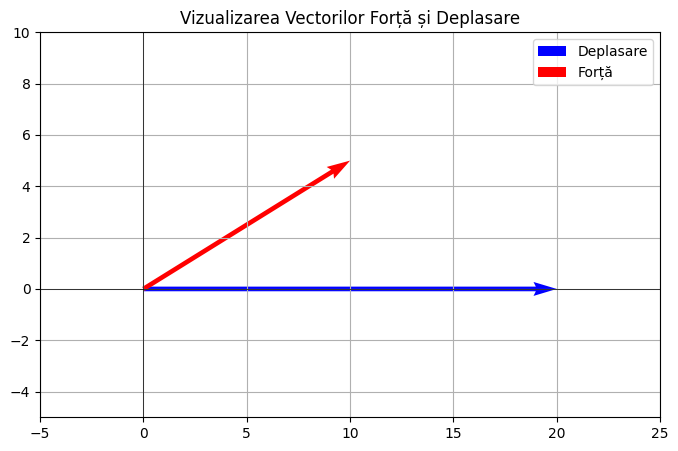

In [ ]:
# Exemplu 8: Calculul lucrului mecanic
import numpy as np
import matplotlib.pyplot as plt

# O cutie este trasă pe podea spre dreapta.
# Vectorul de deplasare (20 de metri spre dreapta, 0 metri în sus)
deplasare = np.array([20, 0])

# O forță este aplicată oblic (10 Newtoni spre dreapta, 5 Newtoni în sus)
forta = np.array([10, 5])

# Calculăm lucrul mecanic folosind produsul scalar
lucru_mecanic = np.dot(forta, deplasare)

print(f"Lucrul mecanic efectuat este: {lucru_mecanic} Jouli")

# --- Vizualizare ---
plt.figure(figsize=(8, 5))
# Desenăm vectorul de deplasare de la origine
# Un "quiver" plot este folosit pentru a desena săgeți (vectori)
plt.quiver(0, 0, deplasare[0], deplasare[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Deplasare')
# Desenăm vectorul forță
plt.quiver(0, 0, forta[0], forta[1], angles='xy', scale_units='xy', scale=1, color='red', label='Forță')

# Setări pentru grafic
plt.xlim(-5, 25)
plt.ylim(-5, 10)
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Vizualizarea Vectorilor Forță și Deplasare")
plt.legend()
plt.show()


# OBS.: Produsul scalar (10*20 + 5*0 = 200) a ignorat automat componenta verticală
# a forței (5N), deoarece deplasarea pe verticală a fost zero.
# Astfel, a calculat exact porțiunea de energie care a contribuit la mișcarea orizontală.

## Valori și Vectori Proprii (Eigenvalues & Eigenvectors)
___

Acum ajungem la unul dintre cele mai puternice concepte din algebra liniară. Imaginați-vă o transformare matricială (ca o rotație sau o scalare) aplicată tuturor vectorilor dintr-un spațiu. Majoritatea vectorilor își vor schimba direcția.

**Vectorii proprii** (eigenvectors) sunt acei vectori speciali care, după aplicarea transformării, **nu își schimbă direcția**. Ei pot fi doar alungiți, scurtați sau inversați.

**Valorile proprii** (eigenvalues) sunt factorii scalari care ne spun *cât de mult* a fost alungit sau scurtat fiecare vector propriu.

Relația fundamentală este:
$$
A\mathbf{v} = \lambda\mathbf{v}
$$
Unde:
* $A$ este matricea de transformare.
* $\mathbf{v}$ este un vector propriu.
* $\lambda$ (lambda) este valoarea proprie corespunzătoare.

In [8]:
# Exemplu 7: Găsirea valorilor și vectorilor proprii

# Definim o matrice de transformare 2x2
A = np.array([
    [2, 1],
    [1, 2]
])

# Calculăm valorile și vectorii proprii folosind NumPy
valori_proprii, vectori_proprii = np.linalg.eig(A)

print("Matricea A:\n", A)
print("\nValorile proprii (lambda):", valori_proprii)
print("\nVectorii proprii (v) (fiecare coloană este un vector):\n", vectori_proprii)

# Verificăm relația A*v = lambda*v pentru primul vector propriu
lambda1 = valori_proprii[0]
v1 = vectori_proprii[:, 0] # Extragem prima coloană

print("\n--- Verificare pentru prima pereche ---")
print("A @ v1 =", A @ v1)
print("lambda1 * v1 =", lambda1 * v1)

# OBS.: `np.linalg.eig` returnează un tuplu: primul element este un array cu
# valorile proprii, iar al doilea este o matrice unde COLOANELE sunt vectorii
# proprii corespunzători. Rezultatele pot avea mici erori de calcul datorită
# modului în care computerele reprezintă numerele raționale.

Matricea A:
 [[2 1]
 [1 2]]

Valorile proprii (lambda): [3. 1.]

Vectorii proprii (v) (fiecare coloană este un vector):
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

--- Verificare pentru prima pereche ---
A @ v1 = [2.12132034 2.12132034]
lambda1 * v1 = [2.12132034 2.12132034]


In [ ]:
# __EXERCIȚIU__
# Se dă matricea de transformare:
# B = np.array([
#     [3, 0],
#     [1, 2]
# ])
# 1. Calculați valorile și vectorii proprii pentru matricea B.
# 2. Afișați rezultatele.
# 3. Verificați matematic că relația A*v = lambda*v este adevărată pentru
#    a doua pereche valoare-vector propriu.

# HINT: Folosiți `np.linalg.eig()`. Pentru verificare, extrageți a doua
# valoare proprie (index 1) și a doua coloană a matricii de vectori proprii.

## Vizualizarea Vectorilor Proprii 🎯

Am discutat teoria din spatele vectorilor proprii: acei vectori speciali care nu își schimbă direcția în urma unei transformări, ci sunt doar scalați. Acum, haideți să vedem acest efect "în acțiune".

Vom genera un set de vectori care arată în toate direcțiile (ca spițele unei roți), le vom aplica o transformare matricială și vom observa cum toți își schimbă direcția, **cu excepția vectorului propriu**.

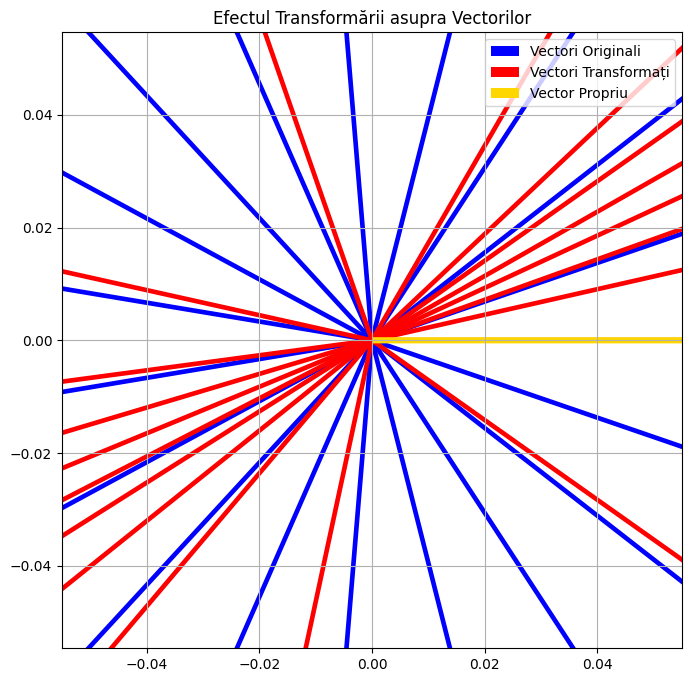

In [ ]:
# Exemplu 10: Vizualizarea efectului unui vector propriu

import numpy as np
import matplotlib.pyplot as plt

# Definim o matrice de transformare
A = np.array([
    [1, 1.5],
    [0, 1]
])

# Calculăm valorile și vectorii proprii
valori_proprii, vectori_proprii = np.linalg.eig(A)
# Extragem primul vector propriu
vector_propriu_1 = vectori_proprii[:, 0]


# Generăm un set de vectori unitari (ca spițele unei roți)
unghiuri = np.linspace(0, 2 * np.pi, 20) # 20 de vectori pe un cerc
vectori_test = np.array([np.cos(unghiuri), np.sin(unghiuri)])

# Aplicăm transformarea A pe toți acești vectori
vectori_transformati = A @ vectori_test


# --- Vizualizare ---
plt.figure(figsize=(8, 8))
# Desenăm vectorii originali
plt.quiver(np.zeros(vectori_test.shape[1]), np.zeros(vectori_test.shape[1]),
           vectori_test[0,:], vectori_test[1,:],
           angles='xy', scale_units='xy', scale=1, color='blue', label='Vectori Originali')

# Desenăm vectorii transformați
plt.quiver(np.zeros(vectori_transformati.shape[1]), np.zeros(vectori_transformati.shape[1]),
           vectori_transformati[0,:], vectori_transformati[1,:],
           angles='xy', scale_units='xy', scale=1, color='red', label='Vectori Transformați')

# Desenăm vectorul propriu cu o linie groasă, pentru a-l evidenția
plt.quiver(0, 0, vector_propriu_1[0], vector_propriu_1[1],
           angles='xy', scale_units='xy', scale=1, color='gold', width=0.01, label='Vector Propriu')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.title("Efectul Transformării asupra Vectorilor")
plt.legend()
plt.axis('equal')
plt.show()


# OBS.: Priviți cu atenție graficul. Toți vectorii albaștri au fost "forfecați"
# și transformați în vectori roșii, schimbându-și direcția. Singurul care a rămas
# pe aceeași linie dreaptă este vectorul propriu (auriu), care a fost doar alungit.
# Acesta este "axa de stabilitate" a transformării.